Import all the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_customers = pd.read_excel('/content/drive/MyDrive/Data Science/customers.xlsx')
data_purchases = pd.read_excel('/content/drive/MyDrive/Data Science/purchases.xlsx')
data_products = pd.read_excel('/content/drive/MyDrive/Data Science/products.xlsx')

# Data Manipulation

Data Customers

In [4]:
data_customers.drop(columns=['Unnamed: 0'], inplace=True)
data_customers.head()

,id,first_name,last_name,email,gender,street_num,street_name,street_suffix,city,state,postcode,full_name
0,1,Romain,Southcott,rsouthcott0@clickbank.net,Male,1,Trailsway,Road,San Diego,California,92127,Romain Southcott
1,2,Cosimo,Molyneaux,cmolyneaux1@wiley.com,Male,1,Trailsway,Road,El Paso,Texas,78220,Cosimo Molyneaux
2,3,Bambi,Westrip,bwestrip2@symantec.com,Female,4057,Arkansas,Circle,San Antonio,Texas,78220,Bambi Westrip
3,4,Roarke,Pankettman,rpankettman3@wiley.com,Male,74,Debs,Point,Memphis,Tennessee,38150,Roarke Pankettman
4,5,Mikaela,Althorpe,malthorpe4@51.la,Male,74,2nd,Drive,Baltimore,Maryland,83732,Mikaela Althorpe


In [5]:
data_customers.dtypes

,0
id,int64
first_name,object
last_name,object
email,object
gender,object
street_num,int64
street_name,object
street_suffix,object
city,object
state,object


In [10]:
data_customers['id'] = data_customers['id'].astype(object)
data_customers['postcode'] = data_customers['postcode'].astype(object)
data_customers['street_num'] = data_customers['street_num'].astype(object)
data_customers.dtypes

,0
id,object
first_name,object
last_name,object
email,object
gender,object
street_num,object
street_name,object
street_suffix,object
city,object
state,object


Data Purchases

In [17]:
data_purchases.dtypes

,0
Unnamed: 0,int64
id,object
purch_date,datetime64[ns]
customer_num,int64
product_num,int64
amount,int64
paid,float64


In [19]:
data_purchases.drop(columns=['Unnamed: 0'], inplace=True)
data_purchases.head()

,id,purch_date,customer_num,product_num,amount,paid
0,1,2019-01-03,823,27,12,568.92
1,2,2019-01-03,606,28,14,395.36
2,3,2019-01-03,955,9,17,510.17
3,4,2019-01-03,577,19,3,68.49
4,5,2019-01-03,429,8,18,759.42


In [21]:
data_purchases['id'] = data_purchases['id'].astype(object)
data_purchases.dtypes

,0
id,object
purch_date,datetime64[ns]
customer_num,int64
product_num,int64
amount,int64
paid,float64


Data Products

In [16]:
data_products.dtypes

,0
id,object
product,object
cost,float64
company,object


In [12]:
data_products.drop(columns=['Unnamed: 0'], inplace=True)
data_products.head()

,id,product,cost,company
0,1,Liners - Baking Cups,6.36,Skipfire
1,2,Nori Sea Weed - Gold Label,85.74,Dynazzy
2,3,Bar Bran Honey Nut,65.40,Ntag
3,4,Soup - Campbells Beef Stew,68.16,Photojam
4,5,Wine - Shiraz Wolf Blass Premium,87.39,Eare


In [15]:
data_products['id'] = data_products['id'].astype(object)
data_products.dtypes

,0
id,object
product,object
cost,float64
company,object


In [29]:
data_customers.shape

(1000, 12)

In [28]:
data_purchases.shape

(6000, 6)

In [31]:
data_products.shape

(60, 4)

In [ ]:
data_customers.isnull().sum()

# Data Visualization

Average Cost Per Company

Groups data by each company.

Calculates the mean of the cost column for each group.

Returns a Pandas Series.

Because we are selecting only one column (cost) and applying an aggregation — the result is a single column with the group labels (company) as the index.

In [7]:
avg_cost_per_company_mean = data_products.groupby('company')['cost'].mean()
avg_cost_per_company_mean

,cost
company,
Aibox,56.330
Babbleopia,63.980
Brainsphere,22.830
Browsezoom,41.050
Cogibox,51.135
Digitube,8.550
Dynabox,99.400
Dynazzy,85.740
Eare,87.390


In [8]:
type(avg_cost_per_company_mean)

pandas.core.series.Series

.reset_index() moves the index (company) back into a normal column, converting the result into a DataFrame.

In [9]:
# data will be converted it into dataframe - as reset index will create indexes for the records
avg_cost_per_company_mean_reset = data_products.groupby('company')['cost'].mean().reset_index()
avg_cost_per_company_mean_reset

,company,cost
0,Aibox,56.330
1,Babbleopia,63.980
2,Brainsphere,22.830
3,Browsezoom,41.050
4,Cogibox,51.135
5,Digitube,8.550
6,Dynabox,99.400
7,Dynazzy,85.740
8,Eare,87.390
9,Eazzy,74.280


In [10]:
type(avg_cost_per_company_mean_reset)

pandas.core.frame.DataFrame

Groups by company.

Uses .agg() to apply one or more aggregation functions.

Returns a DataFrame, even if you aggregate only one column.

In [11]:
avg_cost_per_company_agg_mean = data_products.groupby('company').agg({'cost':'mean'})
avg_cost_per_company_agg_mean

,cost
company,
Aibox,56.330
Babbleopia,63.980
Brainsphere,22.830
Browsezoom,41.050
Cogibox,51.135
Digitube,8.550
Dynabox,99.400
Dynazzy,85.740
Eare,87.390


In [12]:
type(avg_cost_per_company_agg_mean)

pandas.core.frame.DataFrame

# PLOT GRAPHS

Create a bar plot where in x-axis we have company and in y-axis we have average cost per company

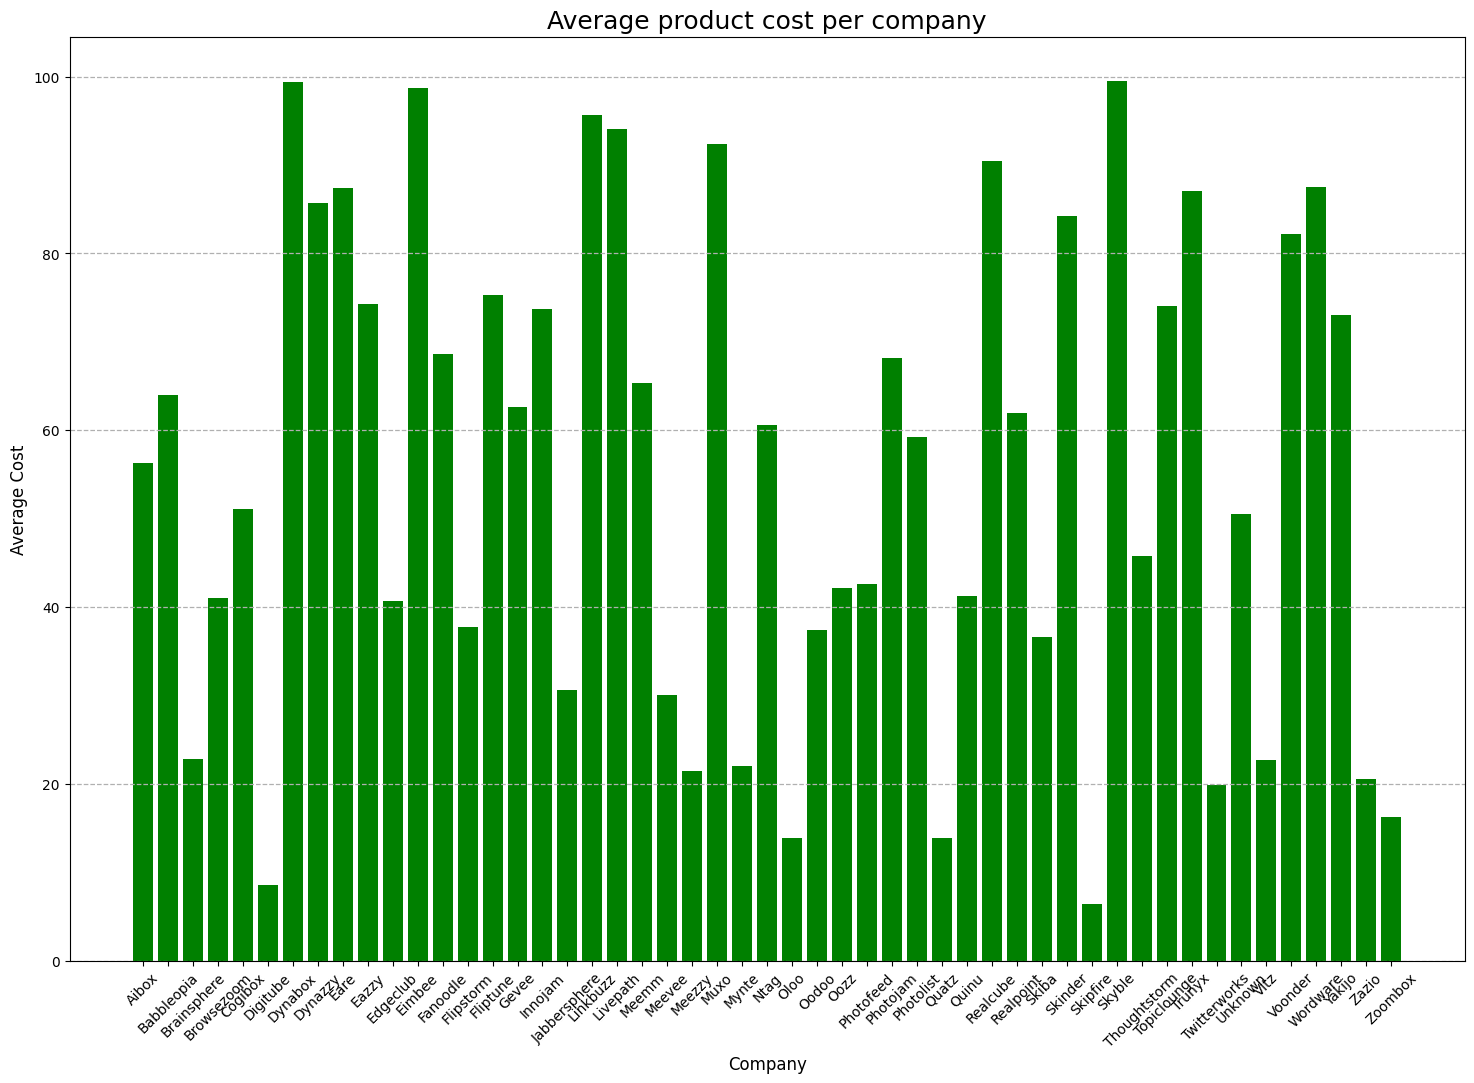

In [20]:
plt.figure(figsize=(18, 12))
plt.bar(avg_cost_per_company_mean_reset['company'], avg_cost_per_company_mean_reset['cost'], color='green')
plt.title('Average product cost per company', fontsize=18)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Cost', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.9)
plt.savefig('average_product_cost_per_company.png')

plt.show()

Around 9–10 main plot types are commonly used with Pandas (via Matplotlib):

line

1. BAR
2. BARH
3. HIST
4. box
5. area
6. pie
7. scatter
8. hexbin
9. kde/density

BOX PLOT GRAPH

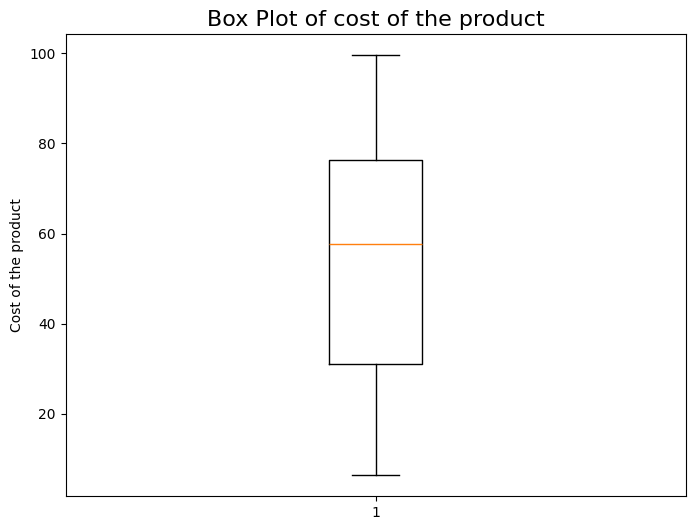

In [25]:
plt.figure(figsize=(8,6))
plt.boxplot(data_products['cost'])

plt.title("Box Plot of cost of the product", fontsize=16)
plt.ylabel('Cost of the product')
plt.savefig('boxplot_cost_product.png')
plt.show()

Create a box plot of the "paid" column in the data_purchases dataframe.

Box plot is created to check outliers in data

Basically, upper whiskers values are called outliers

Outliers - need to be removed or enhanced

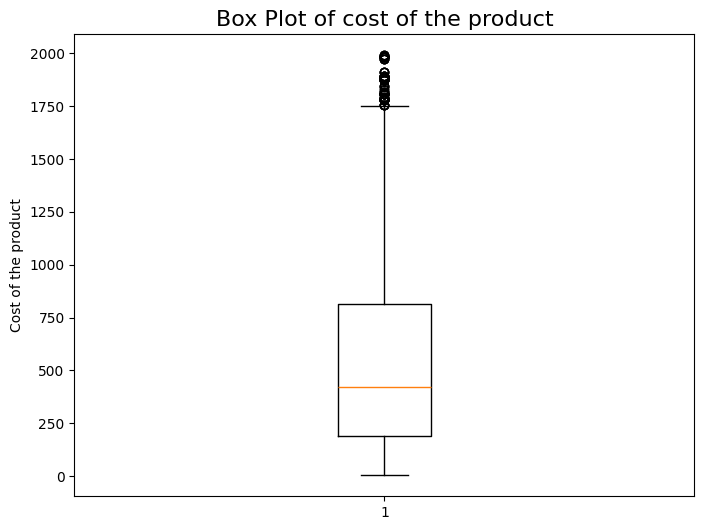

In [22]:
plt.figure(figsize=(8,6))
plt.boxplot(data_purchases['paid'])

plt.title("Box Plot of cost of the product", fontsize=16)
plt.ylabel('Cost of the product')
plt.savefig('boxplot_cost_product.png')
plt.show()

Gender Distribution (%age of values): Pie Chart

In [24]:
gender_counts = data_customers['gender'].value_counts()
gender_counts

,count
gender,
Male,528
Female,472


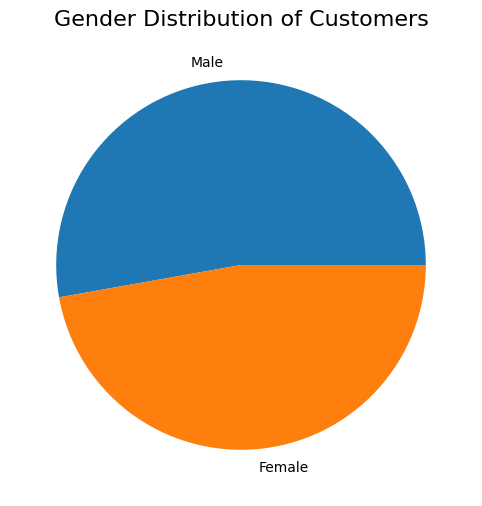

In [26]:
plt.figure(figsize=(8,6))
plt.pie(gender_counts, labels=gender_counts.index)
plt.title('Gender Distribution of Customers', fontsize=16)
plt.savefig('gender_distribution.png')
plt.show()

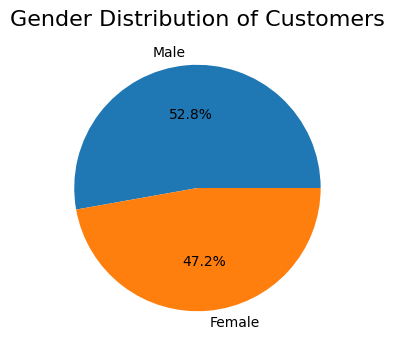

In [32]:
# autopct will show the percentage values
# %1.1f%% = 1 decimal point
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers', fontsize=16)
plt.savefig('gender_distribution.png')
plt.show()

In [ ]:
plt.pie(data_customers['gender'].value_counts(), labels=data_customers['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers', fontsize=16)
plt.savefig('gender_distribution.png')
plt.show()

Task 1: Visualize the customer spending patterns over time on a monthly basis using a line plot.

In [39]:
data_purchases.head()

,Unnamed: 0,id,purch_date,customer_num,product_num,amount,paid
0,0,1,2019-01-03,823,27,12,568.92
1,1,2,2019-01-03,606,28,14,395.36
2,2,3,2019-01-03,955,9,17,510.17
3,3,4,2019-01-03,577,19,3,68.49
4,4,5,2019-01-03,429,8,18,759.42


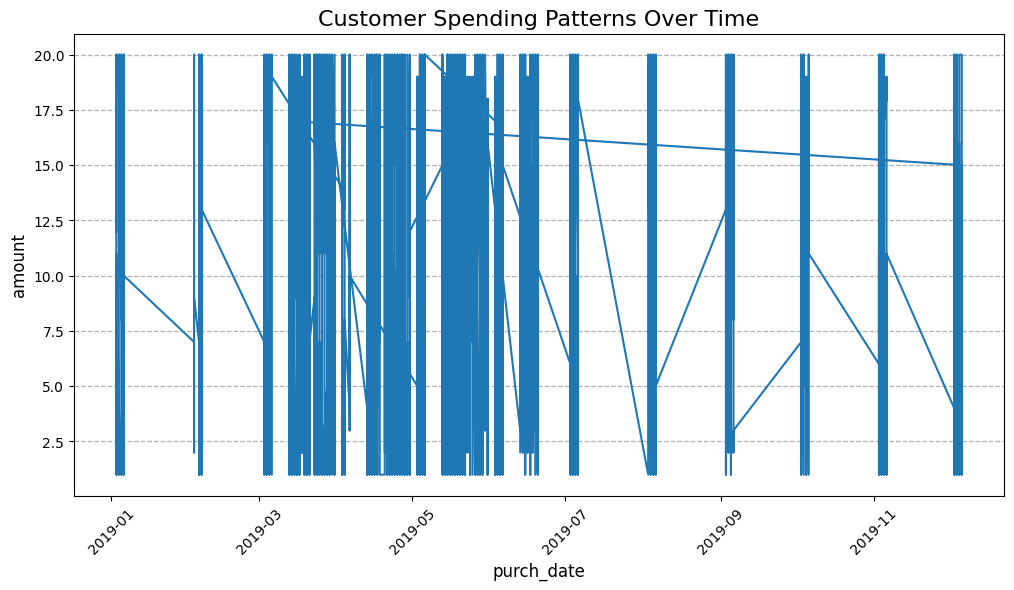

In [47]:
## data_purchases['purch_date'] => Month --> x-axis
## data_purchases['amount'] => Month wise amount --> y-axis
## finally, we will create the line plot (plt.plot(x, y))

plt.figure(figsize=(12,6))
plt.plot(data_purchases['purch_date'], data_purchases['amount'])
plt.title('Customer Spending Patterns Over Time', fontsize=16)
plt.xlabel('purch_date', fontsize=12)
plt.ylabel('amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.9)
plt.savefig('customer_spending_patterns.png')
plt.show()

# Seaborn

Seaborn: simply built on top of matplotlib only.

Seaborn is a Kind of wrapper of Matplotlib.

In [51]:
# inbuilt data set of seaborn
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Total Tips per Day

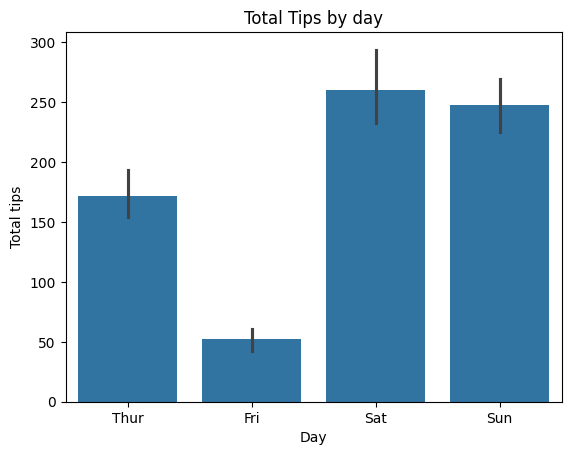

In [53]:
sns.barplot(x='day', y='tip', data=tips, estimator=sum)
plt.title('Total Tips by day')
plt.xlabel('Day')
plt.ylabel('Total tips')
plt.savefig('tips_per_day.png')
plt.show()

KDE Plots: Visualize the probability density function of any given variable.

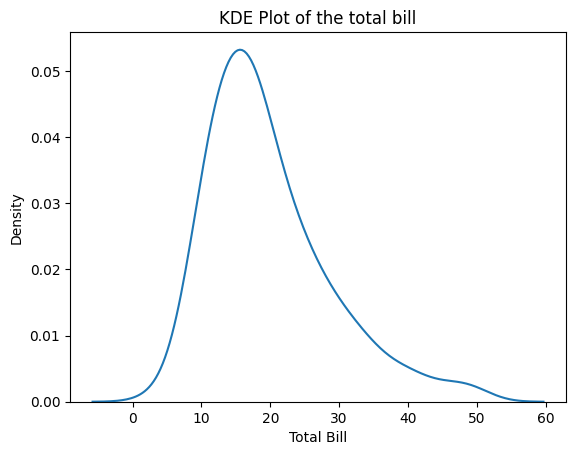

In [55]:
sns.kdeplot(data=tips, x='total_bill')
plt.title('KDE Plot of the total bill')
plt.xlabel('Total Bill')
plt.show()

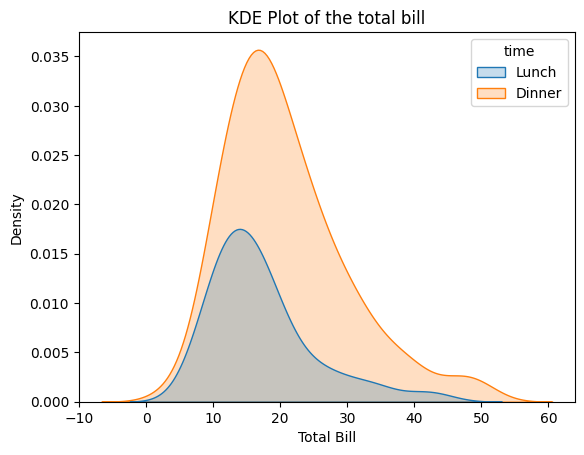

In [56]:
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True)
plt.title('KDE Plot of the total bill')
plt.xlabel('Total Bill')
plt.show()

BOX PLOT

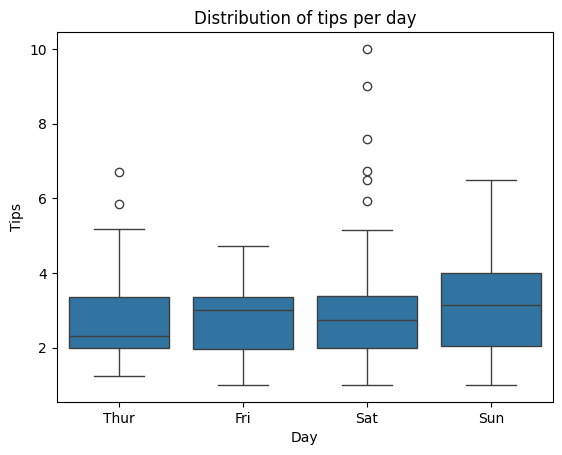

In [57]:
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Distribution of tips per day')
plt.xlabel('Day')
plt.ylabel('Tips')
plt.show()

VIOLIN PLOT

Task 2: Explore about the violinplot (detect the outliers just like the boxplot)

Each violin displays the distribution (density) of the data across days.

The wider sections of the violin represent where data values are more frequent.

The white dot inside represents the median, and the black bar shows the interquartile range (IQR).

The thin line extending out (like whiskers) represents the range of data, and points beyond can indicate outliers.

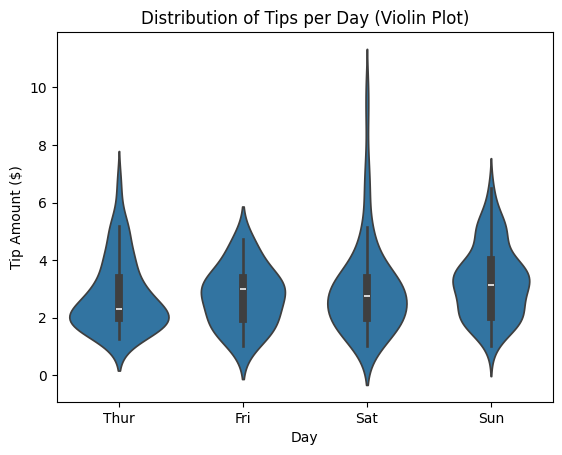

In [58]:
sns.violinplot(x='day', y='tip', data=tips)
plt.title('Distribution of Tips per Day (Violin Plot)')
plt.xlabel('Day')
plt.ylabel('Tip Amount ($)')
plt.show()

In a boxplot, outliers are explicitly marked as dots outside whiskers.

In a violinplot, you detect outliers where:

The tails of the violin extend very thinly away from the bulk of the data.

Or you can overlay a swarmplot or stripplot to see actual points:

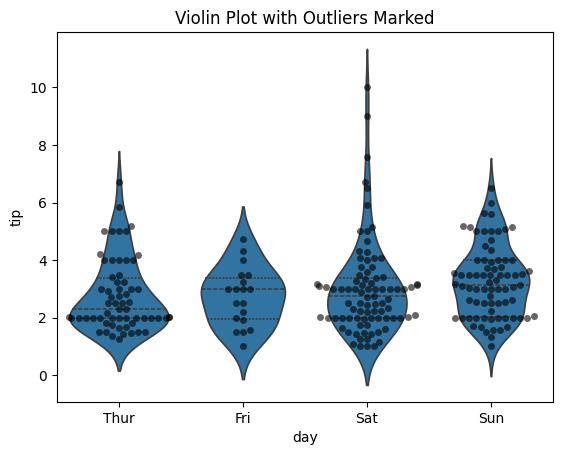

In [59]:
sns.violinplot(x='day', y='tip', data=tips, inner='quartile')
sns.swarmplot(x='day', y='tip', data=tips, color='k', alpha=0.6)
plt.title('Violin Plot with Outliers Marked')
plt.show()

PAIR PLOT

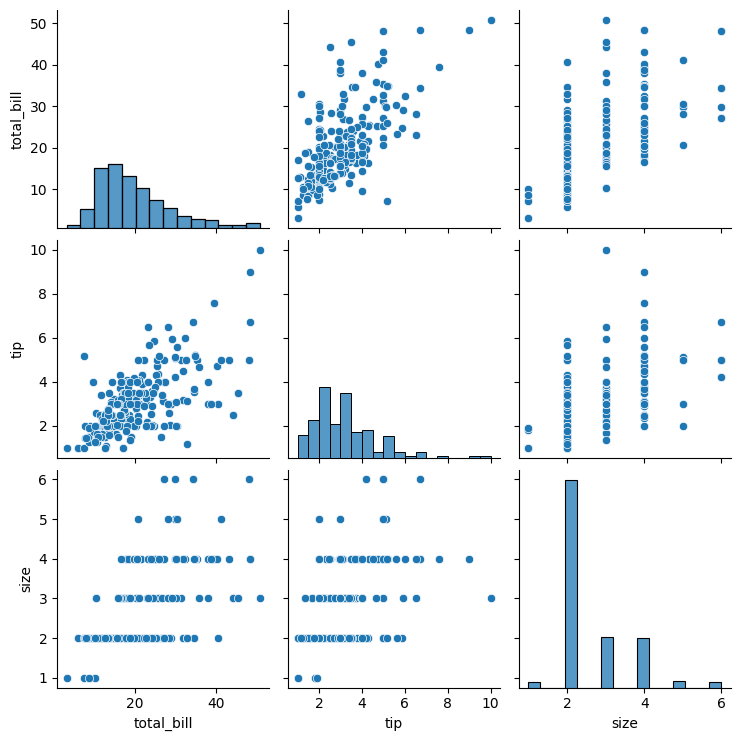

In [60]:
sns.pairplot(data=tips)

REGRESSION PLOT

<Axes: xlabel='total_bill', ylabel='tip'>

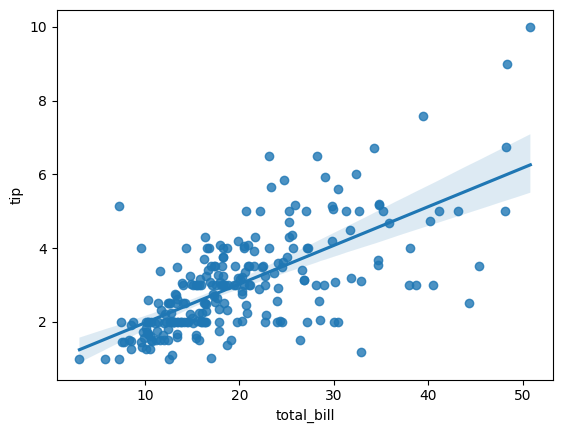

In [61]:
sns.regplot(x='total_bill', y='tip', data=tips)

SCATTER PLOT

<Axes: xlabel='total_bill', ylabel='tip'>

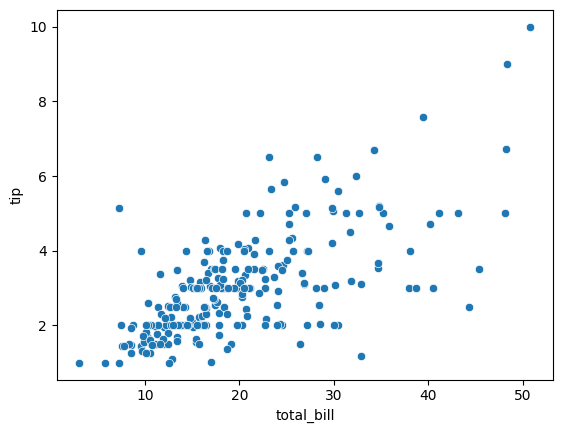

In [62]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

CATEGORY PLOT

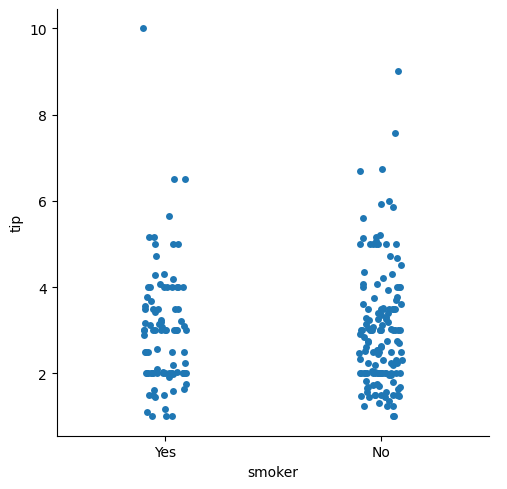

In [64]:
sns.catplot(x='smoker', y='tip', data=tips)

Correlation Coefficient

In [65]:
numeric_tips = tips.select_dtypes(include='number')
correlation_coefficient = numeric_tips.corr()
print(correlation_coefficient)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


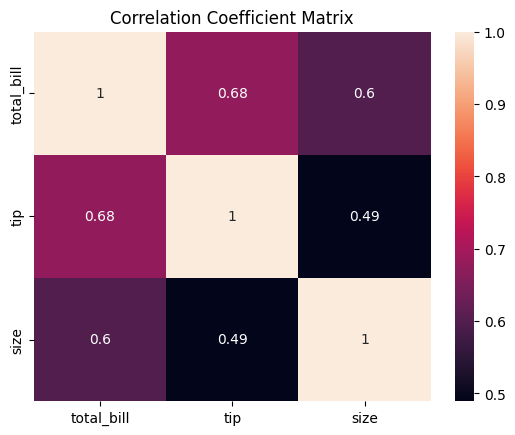

In [66]:
sns.heatmap(correlation_coefficient, annot=True)
plt.title('Correlation Coefficient Matrix')
plt.savefig('correlation_coefficient.png')
plt.show()

In [ ]:
data_customers.to_csv('customers.csv')
data_products.to_csv('products.csv')
data_purchases.to_csv('purchases.csv')